#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#### Utility functions

In [2]:
def plot_loss_epoch(loss, alpha):
    plt.figure(figsize=(10, 8))
    plt.plot(loss, marker='o')
    plt.title(f'Learning Rate = {alpha}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

def plot_theta_loss(theta, loss, alpha, xlabel):
    plt.figure(figsize=(10, 8))
    plt.plot(theta, loss, marker='o')
    plt.title(f'Learning Rate = {alpha}')
    plt.xlabel(xlabel)
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

def plot_lines(X, y, hypothesis):
    plt.figure(figsize=(10, 8))
    for h in hypothesis:
        plt.plot(X, h, color='r')
    
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.xlabel('y')
    plt.grid()
    plt.show()

def plot_best_line(X, y, h):
    plt.figure(figsize=(10, 8))
    plt.plot(X, h, color='r')
    
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.xlabel('y')
    plt.grid()
    plt.show()

#### Read RegData csv file into numpy array 

In [3]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [4]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. 
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [5]:
X = data[:, 0]
y = data[:, 1]

#### Explore your data

In [6]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [7]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

Text(0.5, 0, 'y')

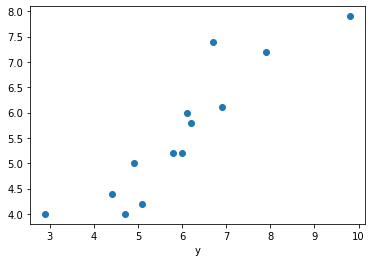

In [8]:
plt.scatter(X, y)
plt.xlabel('X')
plt.xlabel('y')

## Newton

#### Full Batch

In [9]:
def Newton_single_variable_batch(X, y, alpha, maxNumIters):

    gradient_check = 0.001
    cost_check = 0.001
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    hypothesis = []
    for i in range(maxNumIters):
        print(f'****************** Epoch {i} ********************')
        print()

        m = len(X)

        thetas_0_list.append(theta_0)
        thetas_1_list.append(theta_1)

        # 2- Prediction
        h = theta_0 + theta_1 * X
        hypothesis.append(h)

        # 3- Evaluate Prediction (Calculate loss/cost function)
        error = h - y

        # j = np.sum(error**2) / (2*m) # --> Normal equation
        # j = np.linalg.norm(error)**2 / (2*m) # --> By vector Norm
        mse = error @ error / (2*m) # --> By dot product

        j = np.sum(mse)
        cost.append(j)

        # 4- Get gradient
        
        # First derivative
        d_theta_0 = np.sum(error) / m
        d_theta_1 = np.sum(error*X) / m

        # Second derivative
        dd_theta_0 = np.sum(X) / m
        dd_theta_1 = np.sum(X**2) / m

        d_theta = np.array([[d_theta_0],
                            [d_theta_1]])
        
        dd_theta = np.array([[dd_theta_0],
                            [dd_theta_1]])
        
        # 5- Update parameters
        theta_0 = theta_0 - alpha * (d_theta_0/dd_theta_0)
        theta_1 = theta_1 - alpha * (d_theta_1/dd_theta_1)

        d_theta_norm = np.linalg.norm(d_theta)

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        if i > 0:
            if d_theta_norm <= gradient_check or abs(cost[-1] - cost[-2]) <= cost_check:
                break
        
        print('theta_0_new', theta_0)
        print('theta_1_new', theta_1)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {i+1} iterations')
    print()

    print('theta_0_Opt : ', theta_0)
    print('theta_1_Opt : ', theta_1)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]

#### Mini Batch

In [10]:
def Newton_single_variable_mini_batch(X, y, alpha, maxNumIters, batch_size=None):

    # if batch not specified, consider it as full batch
    if not batch_size:
      batch_size = len(X)
    
    gradient_check = 0.001
    cost_check = 0.001
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    cost_per_epoch = []
    hypothesis = []
    for epoch in range(maxNumIters):
        print(f'****************** Epoch {epoch} ********************')
        print()

        for i in range(len(X) // batch_size):

            thetas_0_list.append(theta_0)
            thetas_1_list.append(theta_1)

            # 2- Prediction
            start = i * batch_size
            end = i * batch_size + batch_size

            h = theta_0 + theta_1 * X[start:end]
            hypothesis.append(h)

            # 3- Evaluate Prediction (Calculate loss/cost function)
            error = h - y[start:end]
            mse = error @ error / (2*batch_size)
            j = np.sum(mse)
            cost.append(j)

            # 4- Get gradient
            # First derivative
            d_theta_0 = np.sum(error) / batch_size
            d_theta_1 = np.sum(error * X[start:end]) / batch_size
            
            # Second derivative
            dd_theta_0 = np.sum(X[start:end]) / batch_size
            dd_theta_1 = np.sum(X[start:end]**2) / batch_size

            # 5- Update parameters
            theta_0 = theta_0 - alpha * (d_theta_0/dd_theta_0)
            theta_1 = theta_1 - alpha * (d_theta_1/dd_theta_1)

        d_theta = np.array([[d_theta_0],
                            [d_theta_1]])
        
        dd_theta = np.array([[dd_theta_0],
                            [dd_theta_1]])
        
        d_theta_norm = np.linalg.norm(d_theta)
        
        cost_per_epoch.append(j)

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()

        if epoch > 0:
            if d_theta_norm <= gradient_check or abs(cost_per_epoch[-1] - cost_per_epoch[-2]) <= cost_check:
                break
        
        print('theta_0_new', theta_0)
        print('theta_1_new', theta_1)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {epoch+1} iterations')
    print()

    print('theta_0_Opt : ', theta_0)
    print('theta_1_Opt : ', theta_1)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]

#### Stochastic

In [11]:
def Newton_single_variable_stochastic(X, y, alpha, maxNumIters):

    gradient_check = 0.001
    cost_check = 0.001
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    cost_per_epoch = []
    hypothesis = []
    for epoch in range(maxNumIters):
        print(f'****************** Epoch {epoch} ********************')
        print()

        for i in range(len(X)):

            thetas_0_list.append(theta_0)
            thetas_1_list.append(theta_1)

            # 2- Prediction
            h = theta_0 + theta_1 * X[i]
            hypothesis.append(h)

            # 3- Evaluate Prediction (Calculate loss/cost function)
            error = h - y[i]
            j = error**2 / 2
            cost.append(j)

            # 4- Get gradient
            
            # First derivative
            d_theta_0 = error
            d_theta_1 = error * X[i]

            # Second derivative
            dd_theta_0 = X[i]
            dd_theta_1 = X[i]**2

            # 5- Update parameters
            theta_0 = theta_0 - alpha * (d_theta_0/dd_theta_0)
            theta_1 = theta_1 - alpha * (d_theta_1/dd_theta_1)

        d_theta = np.array([[d_theta_0],
                            [d_theta_1]])
        
        dd_theta = np.array([[dd_theta_0],
                            [dd_theta_1]])
        
        d_theta_norm = np.linalg.norm(d_theta)

        cost_per_epoch.append(j)

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()

        if epoch > 0:
            if d_theta_norm <= gradient_check or abs(cost_per_epoch[-1] - cost_per_epoch[-2]) <= cost_check:
                break
        
        print('theta_0_new', theta_0)
        print('theta_1_new', theta_1)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {epoch+1} iterations')
    print()

    print('theta_0_Opt : ', theta_0)
    print('theta_1_Opt : ', theta_1)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]

### Play with the parameters and see the results

##### The following results uses alpha = 0.05 and max iterations = 500.

In [12]:
alpha = 0.05
iterations = 500
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Newton_single_variable_mini_batch(X, y, alpha, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =  16.305384479692318

Gradient Vector:
 [[ -5.56923074]
 [-35.04384604]]

theta_0_new 0.04677002553557645
theta_1_new 0.04591328675589787

****************** Epoch 1 ********************

h(x): [0.17991856 0.35438904 0.27174514 0.409485   0.49672024 0.36357171
 0.32684107 0.33143239 0.32224975 0.28092778 0.26256246 0.24878849
 0.3130671 ]

Error Vector:
 [-3.82008144 -7.04561106 -4.72825486 -6.79051481 -7.40327985 -5.7364282
 -5.67315893 -5.4685678  -4.87775006 -3.91907203 -3.73743754 -4.1512116
 -4.88693271]

j =  14.490036519220938

Gradient Vector:
 [[ -5.24910007]
 [-33.0131922 ]]

theta_0_new 0.09085161520155952
theta_1_new 0.089166078088324

****************** Epoch 2 ********************

h(x): [0.34943325 0.6

In [13]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.7959282248281268


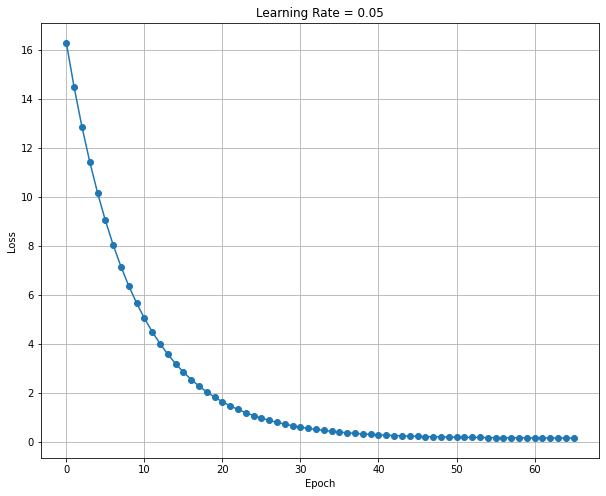

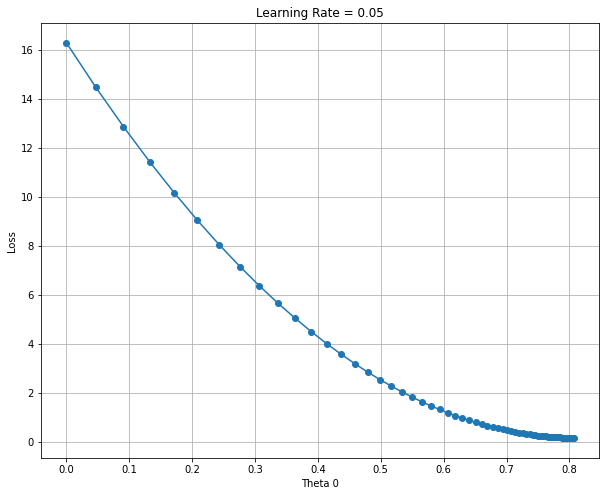

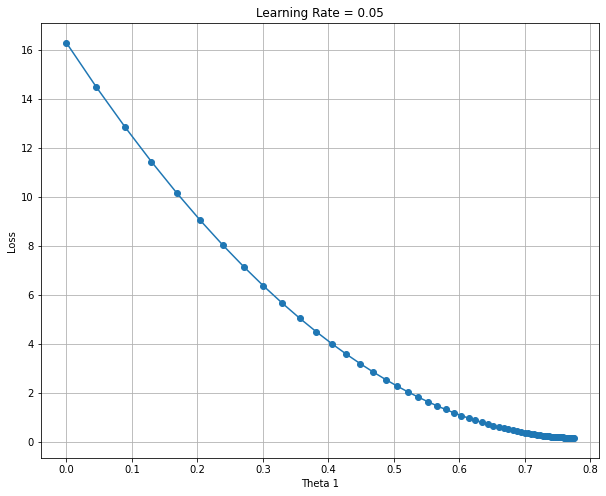

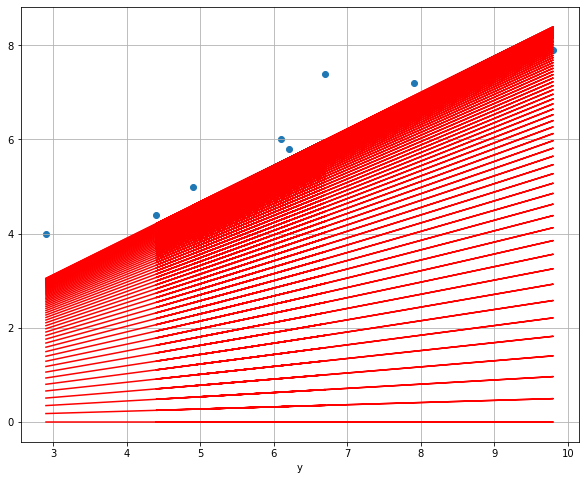

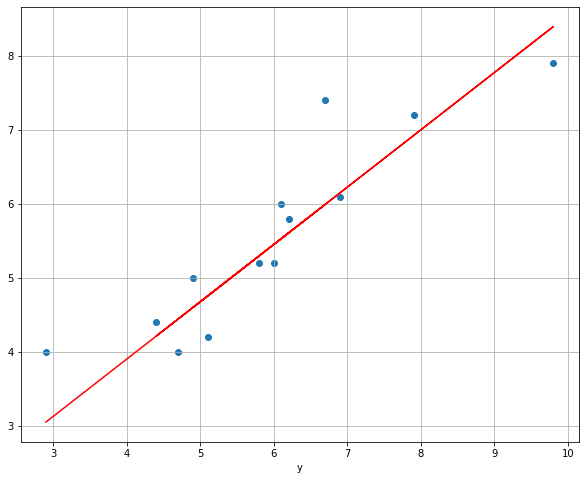

In [14]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.005 and max. iterations = 500.

In [15]:
alpha = 0.005
iterations = 500
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Newton_single_variable_mini_batch(X, y, alpha, iterations)

Streaming output truncated to the last 5000 lines.
 3.91899491 3.97400315 3.86398666 3.36891196 3.14887873 2.983854
 3.75397018]

Error Vector:
 [-1.84127041 -3.15095547 -1.74110452 -2.2908555  -1.94569813 -1.74093854
 -2.08100509 -1.82599704 -1.33601314 -0.83108785 -0.85112127 -1.41614609
 -1.44602963]

j =  1.668316676444816

Gradient Vector:
 [[ -1.73063251]
 [-10.69606142]]

theta_0_new 0.5649423663454375
theta_1_new 0.5514843078750411

****************** Epoch 205 ********************

h(x): [2.16424691 4.25988712 3.26721553 4.92166845 5.96948869 4.37018414
 3.92899659 3.98414497 3.87384821 3.37751228 3.15691851 2.99147337
 3.76355146]

Error Vector:
 [-1.83575309 -3.14011297 -1.73278447 -2.27833136 -1.93051141 -1.72981576
 -2.07100341 -1.81585522 -1.3261516  -0.82248752 -0.84308149 -1.40852672
 -1.43644835]

j =  1.6508630160136042

Gradient Vector:
 [[ -1.72083564]
 [-10.63392795]]

theta_0_new 0.5663875125564176
theta_1_new 0.5528775299047191

****************** Epoch 206 *****

In [16]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.6977609361111857


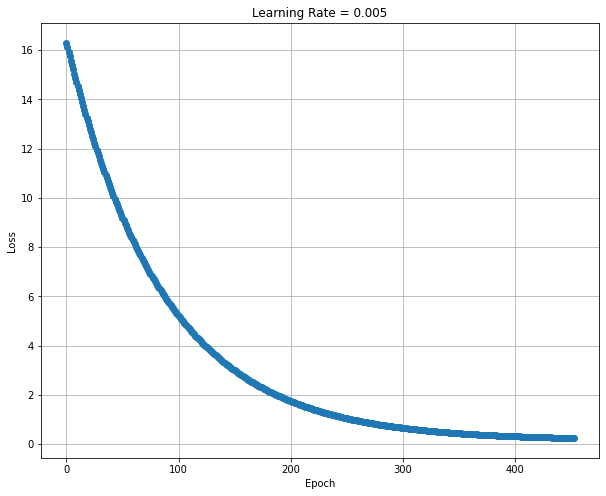

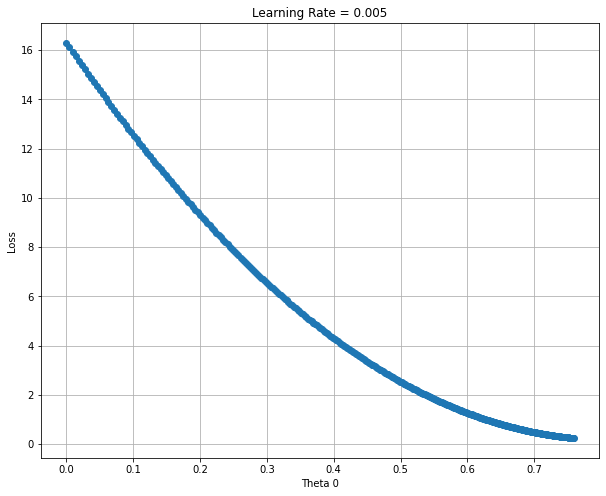

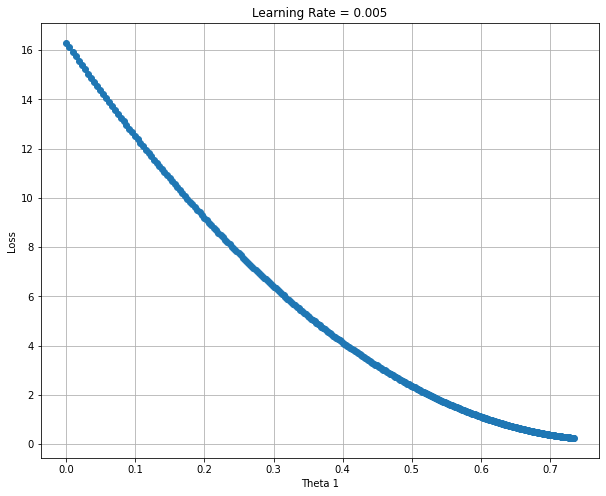

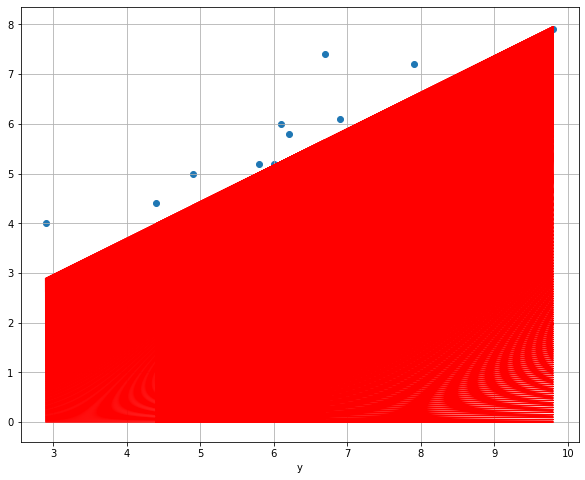

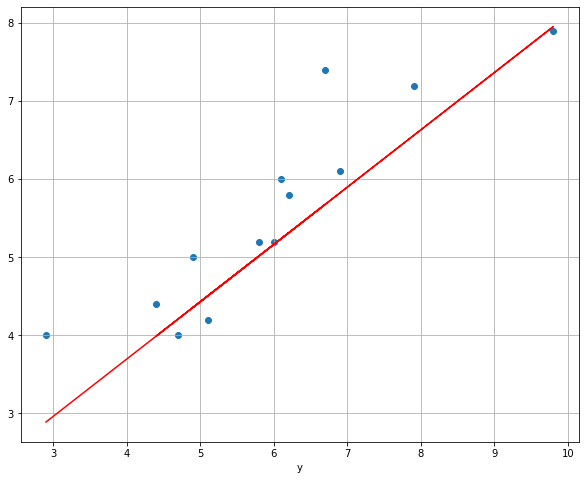

In [17]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.0005 and max. iterations = 5000.

In [18]:
alpha = 0.0005
beta_1 = 0.8
beta_2 = 0.8
epsilon = 1e-08
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Newton_single_variable_mini_batch(X, y, alpha, iterations)

Streaming output truncated to the last 5000 lines.
****************** Epoch 2282 ********************

h(x): [2.28082574 4.48891026 3.44297558 5.18620033 6.29024272 4.60512541
 4.14026537 4.1983728  4.08215793 3.55919045 3.32676043 3.15243812
 3.96594306]

Error Vector:
 [-1.71917426 -2.91108984 -1.55702442 -2.01379948 -1.60975737 -1.4948745
 -1.85973463 -1.60162739 -1.11784188 -0.64080936 -0.67323957 -1.24756198
 -1.23405675]

j =  1.3058567276701076

Gradient Vector:
 [[-1.51389165]
 [-9.32148286]]

theta_0_new 0.5958355644517649
theta_1_new 0.5811970436609564

****************** Epoch 2283 ********************

h(x): [2.28130705 4.48985565 3.44370113 5.18729226 6.2915667  4.60609522
 4.14113748 4.19925712 4.08301783 3.55994043 3.32746156 3.15310261
 3.96677853]

Error Vector:
 [-1.71869295 -2.91014445 -1.55629887 -2.01270754 -1.60843339 -1.49390468
 -1.85886252 -1.60074307 -1.11698198 -0.64005938 -0.67253844 -1.24689748
 -1.23322128]

j =  1.3045262386991412

Gradient Vector:
 [[-1.

In [19]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  -0.2780376906967723


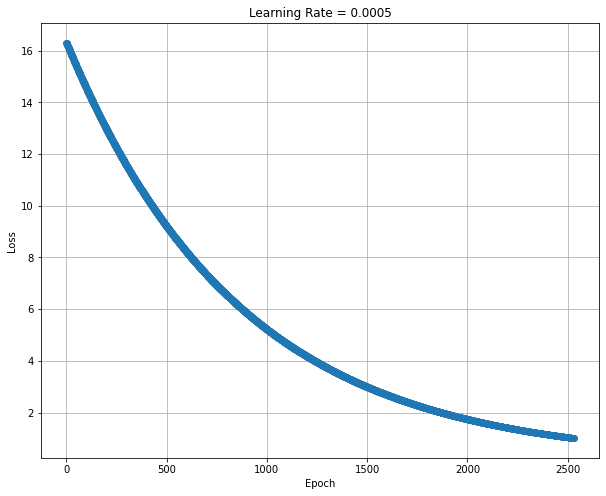

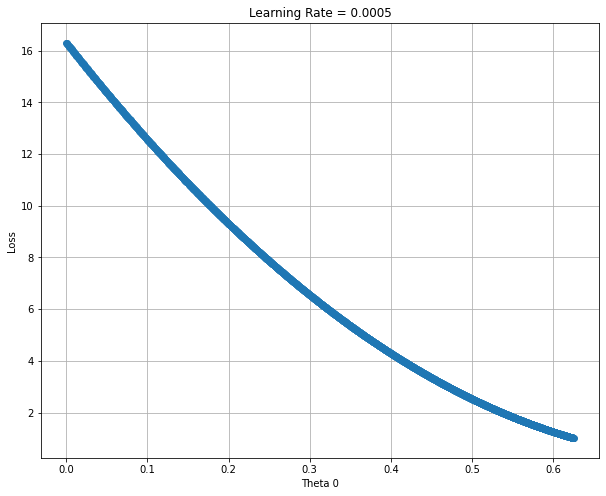

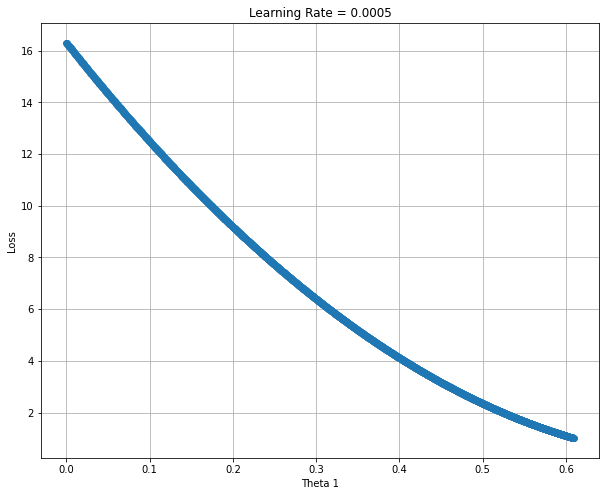

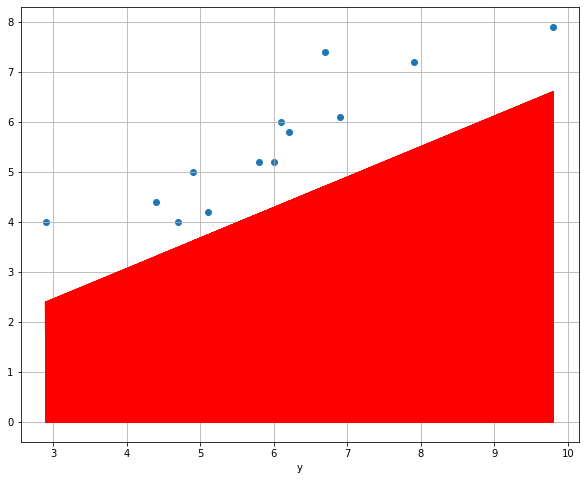

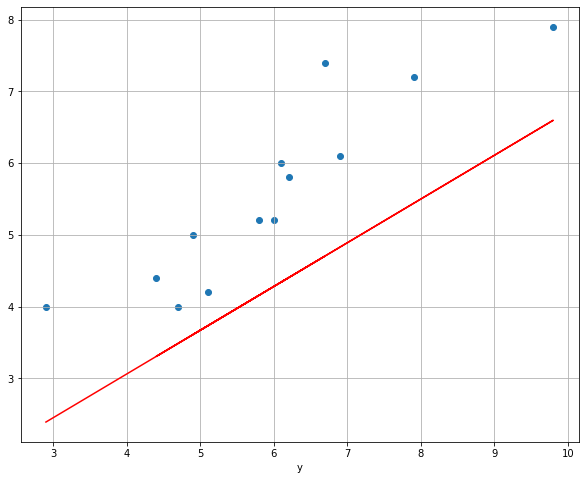

In [20]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.001 and max. iterations = 5000.

In [21]:
alpha = 0.001
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Newton_single_variable_mini_batch(X, y, alpha, iterations)

Streaming output truncated to the last 5000 lines.
****************** Epoch 1317 ********************

h(x): [2.43449685 4.79063641 3.6745704  5.53468071 6.71275064 4.91464394
 4.41861441 4.48061802 4.35661079 3.79857763 3.55056287 3.36455201
 4.23260355]

Error Vector:
 [-1.56550315 -2.60936369 -1.3254296  -1.6653191  -1.18724946 -1.18535596
 -1.58138559 -1.31938217 -0.84338902 -0.40142217 -0.44943713 -1.03544808
 -0.96739626]

j =  0.9203175695886938

Gradient Vector:
 [[-1.24123703]
 [-7.59236583]]

theta_0_new 0.6365986355343487
theta_1_new 0.620235716682686

****************** Epoch 1318 ********************

h(x): [2.43528227 4.79217782 3.67575371 5.53646086 6.71490878 4.91622514
 4.42003645 4.48205996 4.35801294 3.79980073 3.55170639 3.36563585
 4.23396591]

Error Vector:
 [-1.56471773 -2.60782228 -1.32424629 -1.66353895 -1.18509132 -1.18377477
 -1.57996355 -1.31794023 -0.84198687 -0.40019908 -0.44829361 -1.03436425
 -0.9660339 ]

j =  0.91854935903643

Gradient Vector:
 [[-1.23

In [22]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.26451242053407886


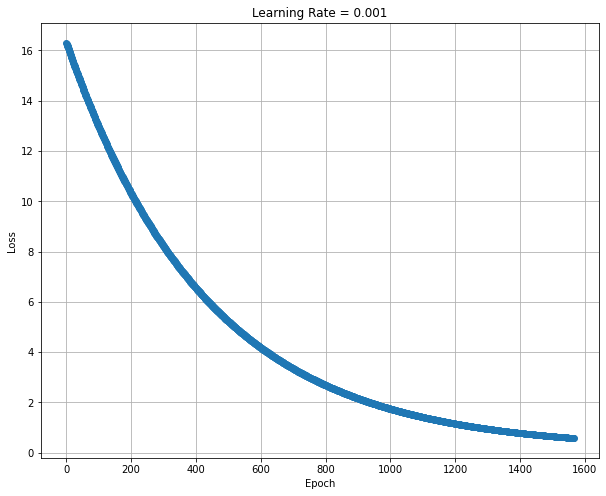

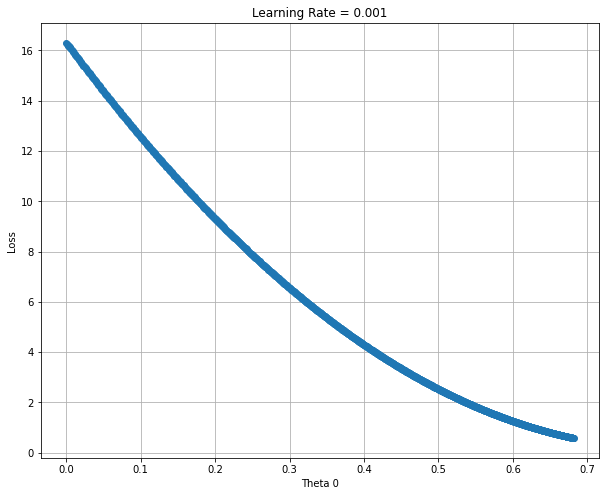

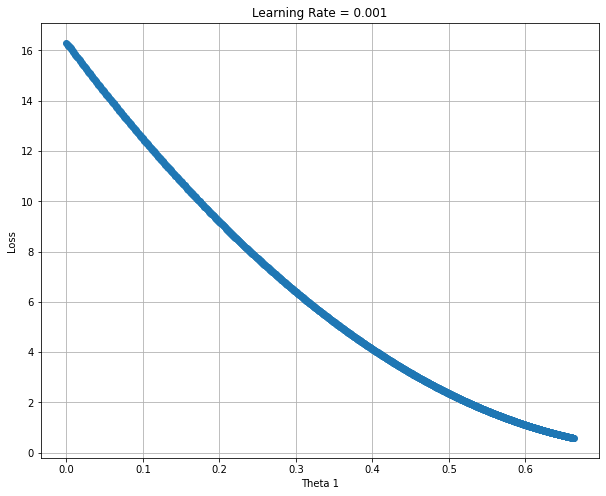

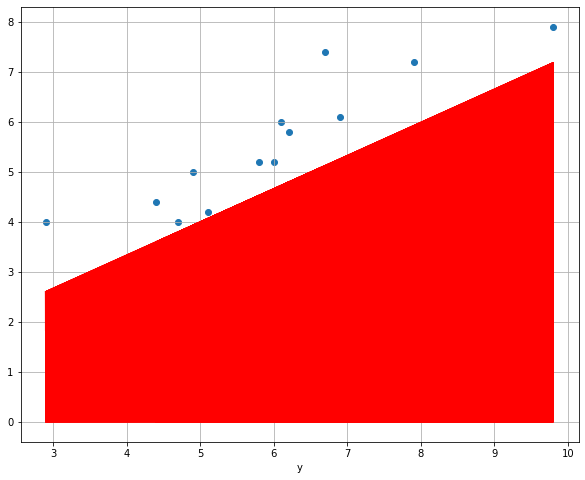

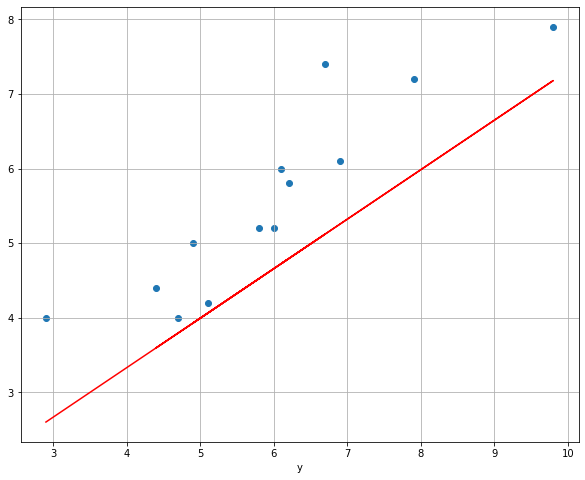

In [23]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.01 and max. iterations = 5000.

In [24]:
alpha = 0.01
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Newton_single_variable_mini_batch(X, y, alpha, iterations)

Streaming output truncated to the last 5000 lines.
 0.48107685]

Error Vector:
 [-3.72351673 -6.85542872 -4.58241772 -6.57076901 -7.13672523 -5.54131861
 -5.49775832 -5.29070357 -4.70481308 -3.76830764 -3.59652764 -4.01769256
 -4.71892296]

j =  13.560442080895216

Gradient Vector:
 [[ -5.07730014]
 [-31.92343961]]

theta_0_new 0.080417468046584
theta_1_new 0.07891451172901312

****************** Epoch 9 ********************

h(x): [0.30926956 0.60914468 0.46709858 0.70384212 0.8537797  0.62492761
 0.56179598 0.56968743 0.55390454 0.48288147 0.45131566 0.42764133
 0.53812165]

Error Vector:
 [-3.69073044 -6.79085541 -4.53290142 -6.49615769 -7.0462204  -5.4750723
 -5.43820402 -5.23031277 -4.64609527 -3.71711834 -3.54868434 -3.97235877
 -4.66187816]

j =  13.251900548228834

Gradient Vector:
 [[ -5.01896841]
 [-31.55343221]]

theta_0_new 0.08884725993778694
theta_1_new 0.0871825641546649

****************** Epoch 10 ********************

h(x): [0.3416767  0.67297042 0.51604183 0.77758953

In [25]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.7522317495371451


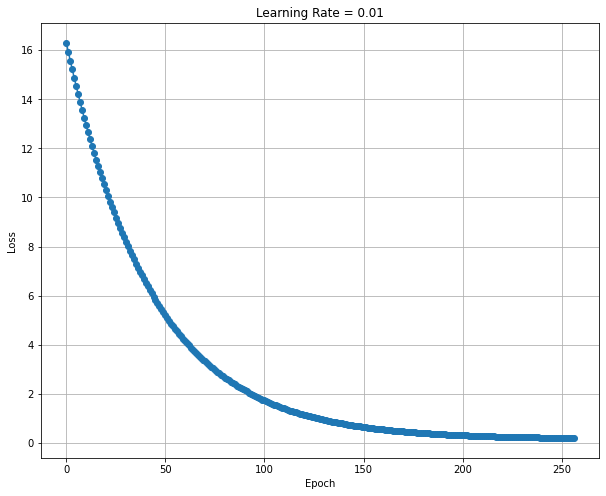

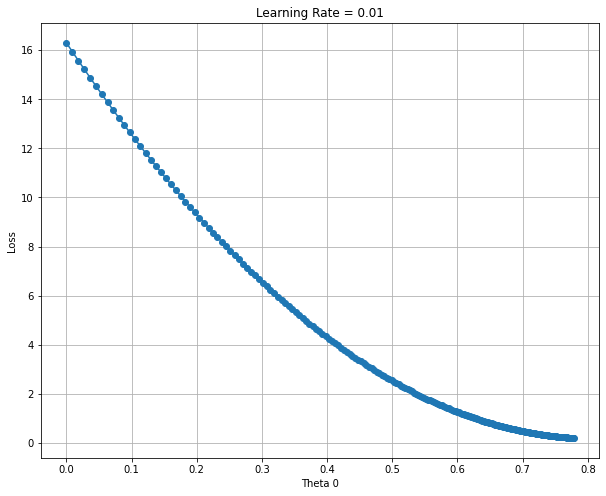

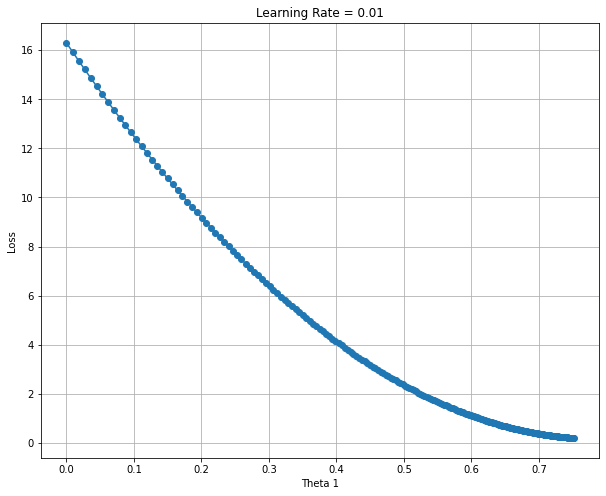

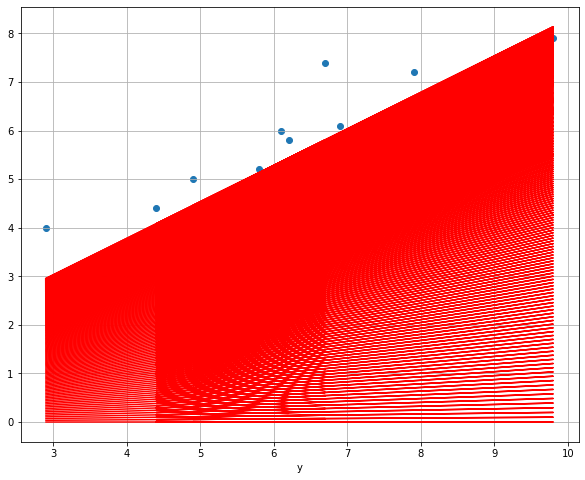

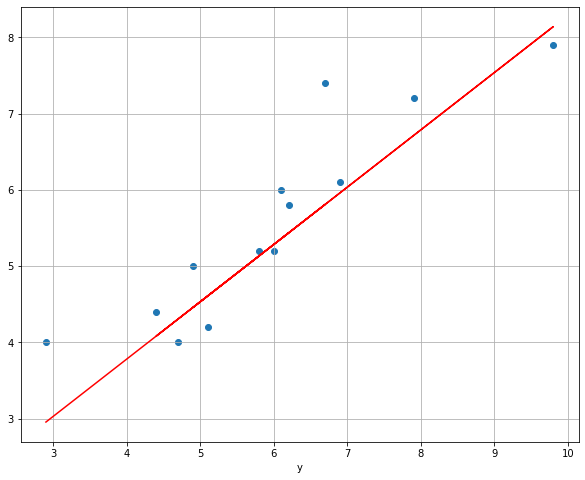

In [26]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.05 and max. iterations = 5000.

In [27]:
alpha = 0.05
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Newton_single_variable_mini_batch(X, y, alpha, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =  16.305384479692318

Gradient Vector:
 [[ -5.56923074]
 [-35.04384604]]

theta_0_new 0.04677002553557645
theta_1_new 0.04591328675589787

****************** Epoch 1 ********************

h(x): [0.17991856 0.35438904 0.27174514 0.409485   0.49672024 0.36357171
 0.32684107 0.33143239 0.32224975 0.28092778 0.26256246 0.24878849
 0.3130671 ]

Error Vector:
 [-3.82008144 -7.04561106 -4.72825486 -6.79051481 -7.40327985 -5.7364282
 -5.67315893 -5.4685678  -4.87775006 -3.91907203 -3.73743754 -4.1512116
 -4.88693271]

j =  14.490036519220938

Gradient Vector:
 [[ -5.24910007]
 [-33.0131922 ]]

theta_0_new 0.09085161520155952
theta_1_new 0.089166078088324

****************** Epoch 2 ********************

h(x): [0.34943325 0.6

In [28]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.7959282248281268


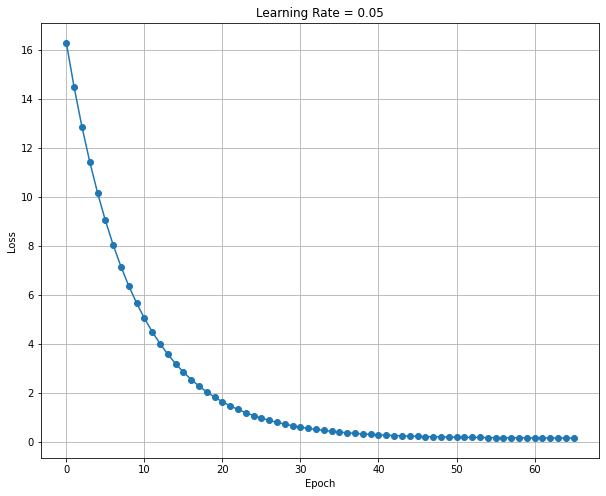

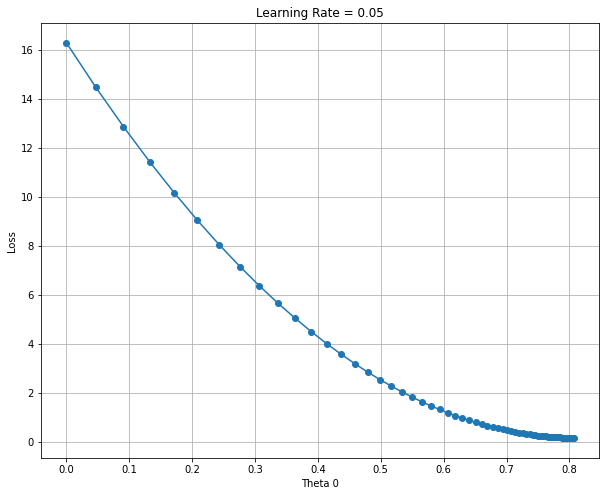

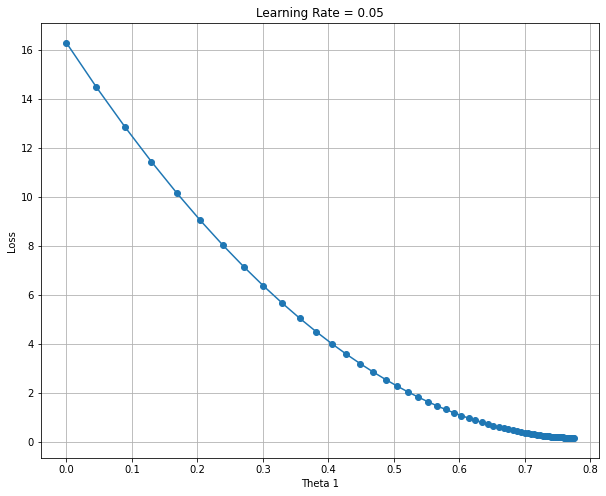

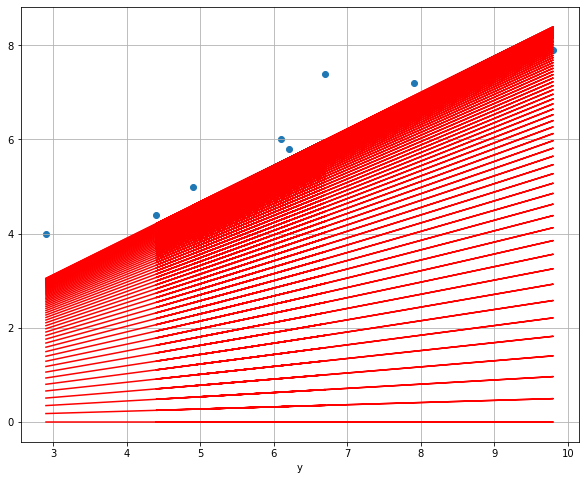

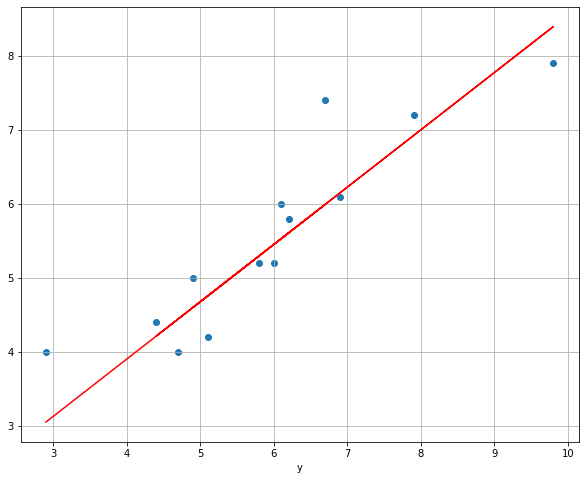

In [29]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.1 and max. iterations = 5000.

In [30]:
alpha = 0.1
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Newton_single_variable_mini_batch(X, y, alpha, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =  16.305384479692318

Gradient Vector:
 [[ -5.56923074]
 [-35.04384604]]

theta_0_new 0.0935400510711529
theta_1_new 0.09182657351179574

****************** Epoch 1 ********************

h(x): [0.35983712 0.70877808 0.54349027 0.81896999 0.99344049 0.72714342
 0.65368214 0.66286479 0.64449949 0.56185557 0.52512493 0.49757698
 0.62613419]

Error Vector:
 [-3.64016288 -6.69122202 -4.45650973 -6.38102982 -6.90655961 -5.37285649
 -5.34631786 -5.1371354  -4.55550032 -3.63814424 -3.47487507 -3.90242311
 -4.57386561]

j =  12.782895070455218

Gradient Vector:
 [[ -4.9289694 ]
 [-30.98253836]]

theta_0_new 0.17632635866393223
theta_1_new 0.17301116532970445

****************** Epoch 2 ********************

h(x): [0.67805875 

In [31]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.8010449706787315


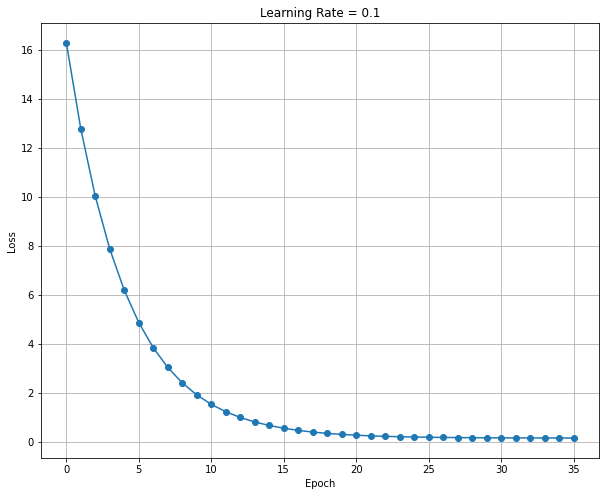

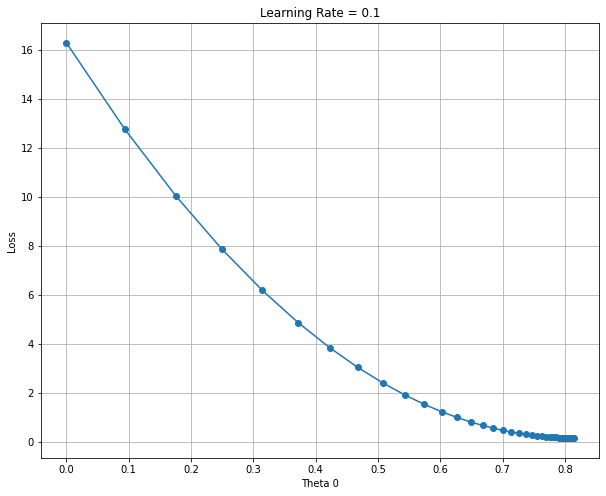

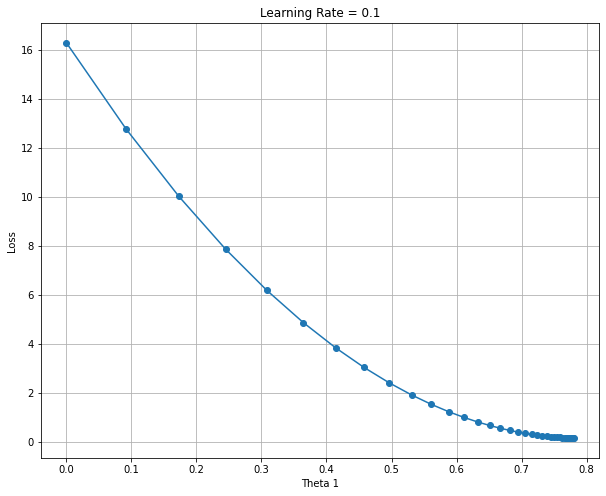

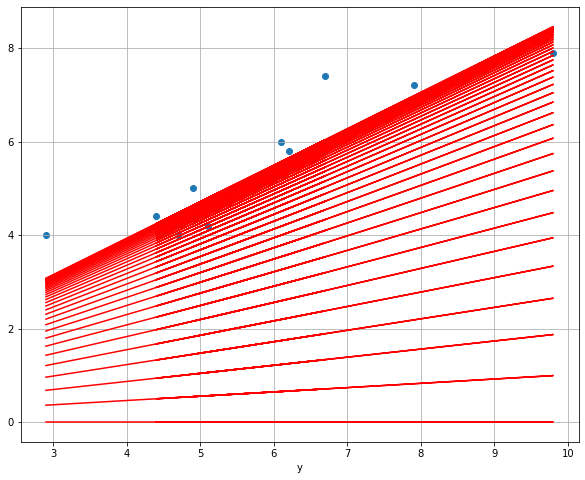

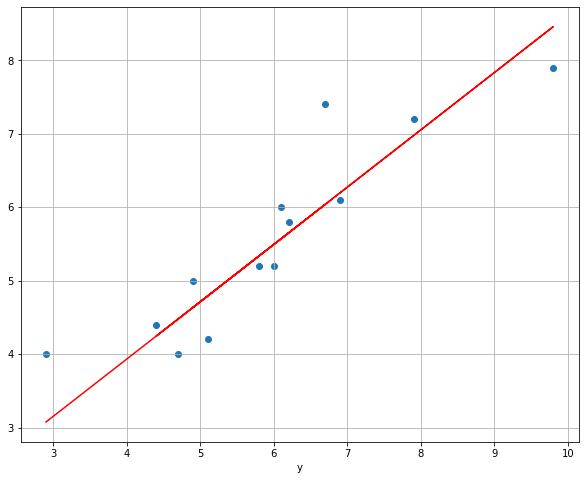

In [32]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.5 and max. iterations = 5000.

In [33]:
alpha = 0.5
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Newton_single_variable_mini_batch(X, y, alpha, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =  16.305384479692318

Gradient Vector:
 [[ -5.56923074]
 [-35.04384604]]

theta_0_new 0.4677002553557645
theta_1_new 0.45913286755897864

****************** Epoch 1 ********************

h(x): [1.79918561 3.54389038 2.71745135 4.09484995 4.96720245 3.63571709
 3.2684107  3.31432395 3.22249746 2.80927784 2.62562465 2.48788492
 3.13067097]

Error Vector:
 [-2.20081439 -3.85610971 -2.28254865 -3.10514986 -2.93279765 -2.46428282
 -2.7315893  -2.48567624 -1.97750235 -1.39072197 -1.37437535 -1.91211518
 -2.06932883]

j =  3.021197901733293

Gradient Vector:
 [[ -2.36792402]
 [-14.73730765]]

theta_0_new 0.6665569237521893
theta_1_new 0.6522161927707812

****************** Epoch 2 ********************

h(x): [2.55798394 5.0

In [34]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.80461966883676


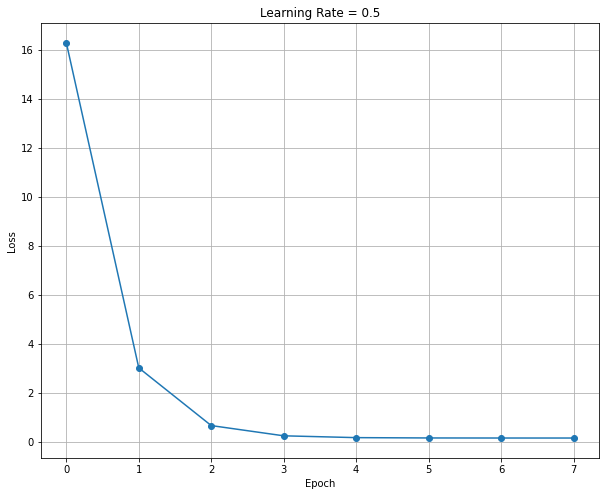

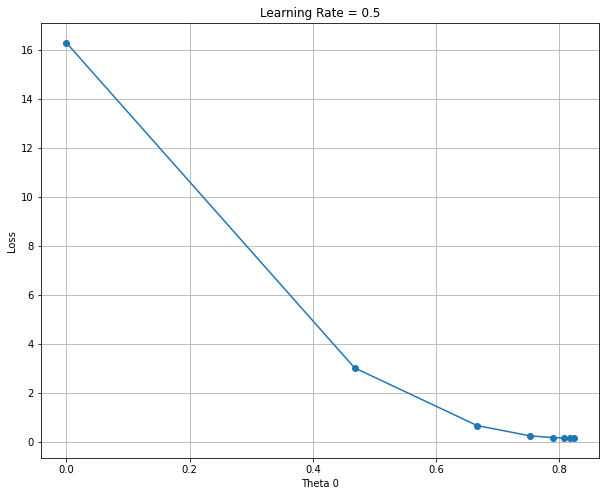

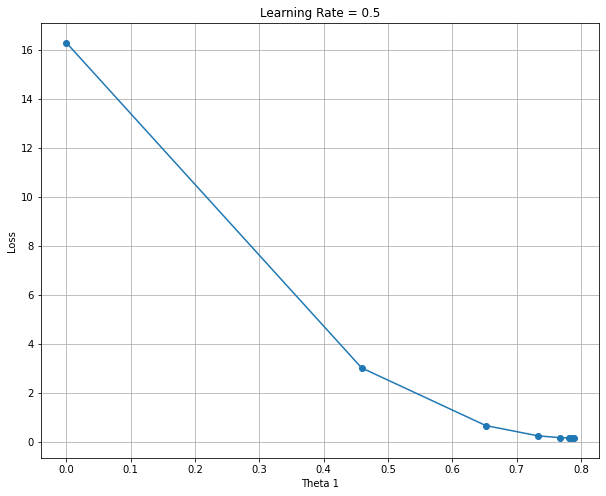

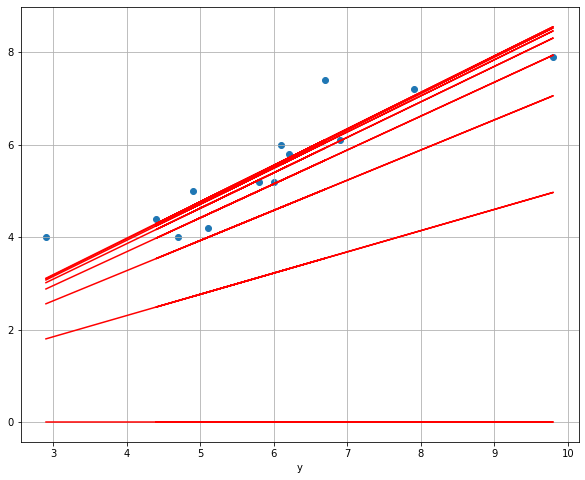

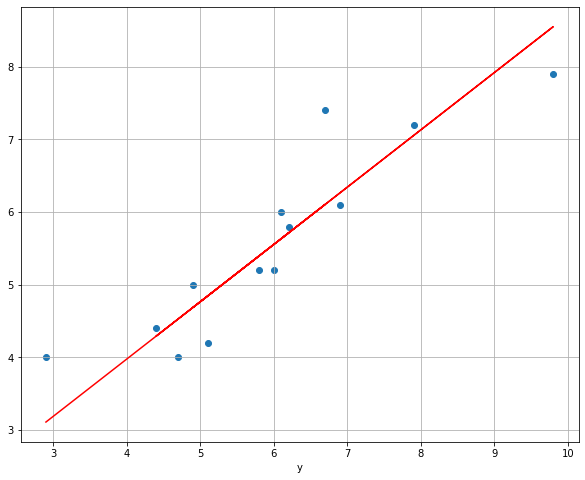

In [35]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 1 and max. iterations = 5000.

In [36]:
alpha = 1
iterations = 5000
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Newton_single_variable_mini_batch(X, y, alpha, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =  16.305384479692318

Gradient Vector:
 [[ -5.56923074]
 [-35.04384604]]

theta_0_new 0.935400510711529
theta_1_new 0.9182657351179573

****************** Epoch 1 ********************

h(x): [3.59837123 7.08778076 5.4349027  8.18969991 9.93440489 7.27143417
 6.53682141 6.62864789 6.44499492 5.61855567 5.25124929 4.97576983
 6.26134195]

Error Vector:
 [-0.40162877 -0.31221933  0.4349027   0.9897001   2.0344048   1.17143427
  0.53682141  0.8286477   1.24499511  1.41855586  1.25124929  0.57576974
  1.06134214]

j =  0.5576624943403979

Gradient Vector:
 [[0.83338269]
 [5.56923074]]

theta_0_new 0.7954266735856994
theta_1_new 0.77233330084721

****************** Epoch 2 ********************

h(x): [3.03519332 5.97005964

In [37]:
h = theta_0_opt + theta_1_opt * X
print('r2 score = ', r2_score(y, h))

r2 score =  0.8048981766743957


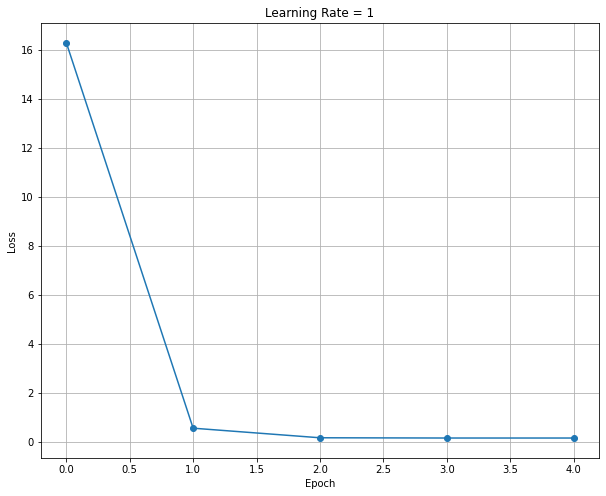

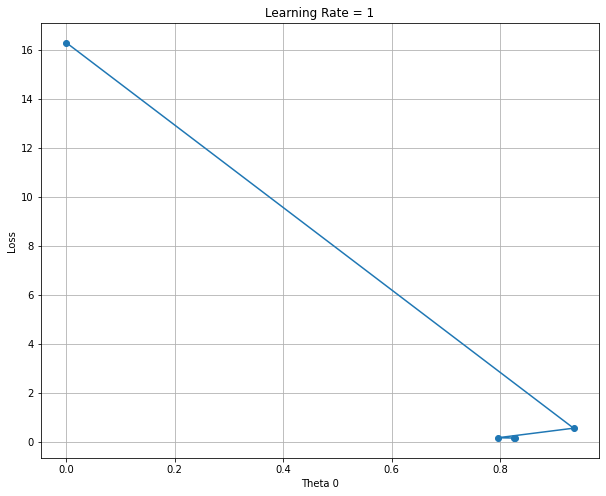

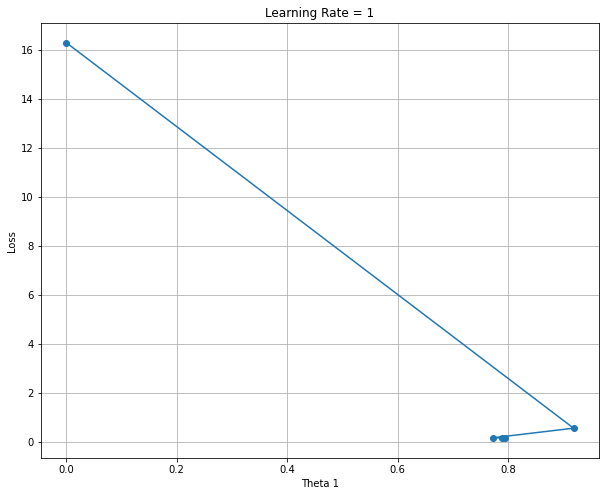

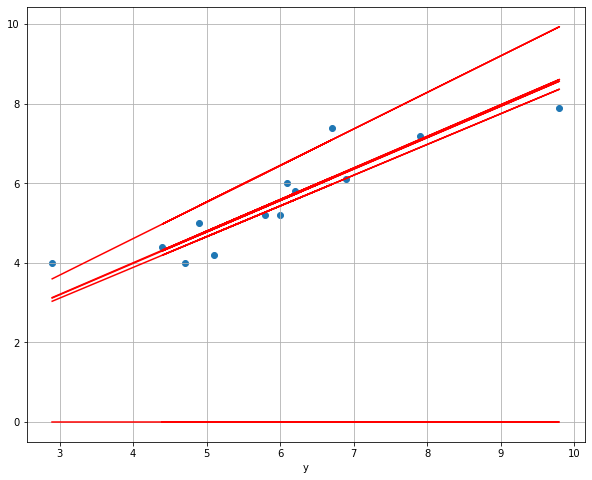

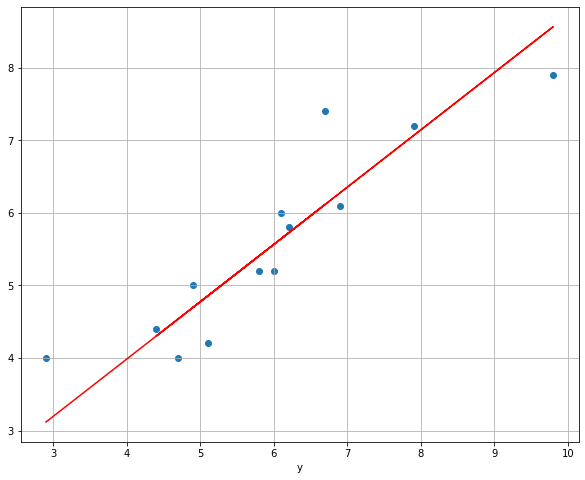

In [38]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

## Multivariate

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,X, and x3.
#### The last column is the target label y.

In [39]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [40]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [41]:
X = data[:, :-1]
y = data[:, -1]

In [42]:
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [43]:
y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b> 
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [44]:
X = np.insert(X, 0, 1, axis=1)
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [45]:
y = y.reshape(len(y), 1)
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

## Newton

#### Full Batch

In [46]:
def Newton_multi_variable_batch(X, y, alpha, maxNumIters, ones=False):

    # Append ones to first columns if 'ones' parameter is true
    if ones:
      X = np.insert(X, 0, 1, axis=1)
    
    # 1- Initialize parameters and hyper-paramters
    theta = np.zeros((X.shape[1], 1))
    gradient_check = 0.001
    cost_check = 0.001

    theta_list = []
    cost = []
    hypothesis = []

    for i in range(maxNumIters):
        print(f'****************** Iteration {i} ********************')
        print()

        theta_list.append(theta)

        # 2- Prediction
        h = X @ theta
        hypothesis.append(h)

        # 3- Evaluate Prediction (Calculate loss/cost function)
        error = h - y

        # j = np.sum(error**2) / (2*m) # --> Normal equation
        # j = np.linalg.norm(error)**2 / (2*m) # --> By vector Norm
        j = error.T @ error / (2*len(X)) # --> By dot product

        cost.append(j.squeeze())

        # 4- Get gradient
        
        # First derivative
        d_theta = X.T @ error / len(X)
        
        # Second derivative
        dd_theta = X.T @ X / len(X)

        hessian = np.linalg.inv(dd_theta)

        # 5- Update parameters
        theta = theta - alpha * hessian @ d_theta

        d_theta_norm = np.linalg.norm(d_theta)

        print('h(x):\n', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()

        if i > 0:
            if d_theta_norm <= gradient_check or abs(cost[-1] - cost[-2]) <= cost_check:
                break
        
        print('thetas_new : \n ', theta)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {i+1} iterations')
    print()

    print('theta_Opt : \n', theta)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return theta_list, cost, hypothesis, theta_list[-1]


#### Mini Batch

In [47]:
def Newton_multi_variable_mini_batch(X, y, alpha, maxNumIters, batch_size=None, ones=False):

    # if batch not specified, consider it as full batch
    if not batch_size:
      batch_size = len(X)
    
    # Append ones to first columns if 'ones' parameter is true
    if ones:
      X = np.insert(X, 0, 1, axis=1)

    gradient_check = 0.001
    cost_check = 0.001
    theta = np.zeros((X.shape[1], 1))
    
    theta_list = []
    cost = []
    cost_per_epoch = []
    hypothesis = []
    for epoch in range(maxNumIters):
        print(f'****************** Epoch {epoch} ********************')
        print()

        for i in range(len(X) // batch_size):

            theta_list.append(theta)

            # 2- Prediction
            start = i * batch_size
            end = i * batch_size + batch_size

            h = X[start:end] @ theta
            hypothesis.append(h)

            # 3- Evaluate Prediction (Calculate loss/cost function)
            error = h - y[start:end]
            j = error.T @ error / (2*batch_size)
            cost.append(j.squeeze())

            # 4- Get gradient
            # First derivative
            d_theta = X[start:end].T @ error / batch_size

            # Second derivative
            dd_theta = X[start:end].T @ X[start:end] / batch_size
        
            hessian = np.linalg.inv(dd_theta)

            # 5- Update parameters
            theta = theta - alpha * hessian @ d_theta

        d_theta_norm = np.linalg.norm(d_theta)
      
        cost_per_epoch.append(j)

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()

        if epoch > 0:
            if d_theta_norm <= gradient_check or abs(cost_per_epoch[-1] - cost_per_epoch[-2]) <= cost_check:
                break
        
        print('theta_new', theta)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {epoch+1} iterations')
    print()

    print('theta_Opt : ', theta)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return theta_list, cost, hypothesis, theta_list[-1]

#### Stochastic

In [48]:
def Newton_multi_variable_stochastic(X, y, alpha, maxNumIters, ones=False):

    # Append ones to first columns if 'ones' parameter is true
    if ones:
      X = np.insert(X, 0, 1, axis=1)

    gradient_check = 0.001
    cost_check = 0.001
    theta = np.zeros((X.shape[1], 1))
    
    theta_list = []
    cost = []
    cost_per_epoch = []
    hypothesis = []
    for epoch in range(maxNumIters):
        print(f'****************** Epoch {epoch} ********************')
        print()

        for i in range(len(X)):

            theta_list.append(theta)

            # 2- Prediction
            h = X[i] @ theta
            hypothesis.append(h)

            # 3- Evaluate Prediction (Calculate loss/cost function)
            error = h - y[i]
            j = error.T @ error / (2)
            cost.append(j.squeeze())

            # 4- Get gradient
            # First derivative
            d_theta = X[i].T * error

            # Second derivative
            dd_theta = X[i].T @ X[i]
            
            # 5- Update parameters
            theta = (theta - alpha * (d_theta/dd_theta))[0].reshape(-1, 1)

        d_theta_norm = np.linalg.norm(d_theta)

        cost_per_epoch.append(j)

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()

        if epoch > 0:
            if d_theta_norm <= gradient_check or abs(cost_per_epoch[-1] - cost_per_epoch[-2]) <= cost_check:
                break
        
        print('theta_new', theta)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {epoch+1} iterations')
    print()

    print('theta_Opt : ', theta)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return theta_list, cost, hypothesis, theta_list[-1]

### Play with the parameters and see the results

##### The following results uses alpha = 0.05 and max iterations = 500.

In [75]:
alpha = 0.05
iterations = 500
theta_list, cost, hypothesis, theta_opt = Newton_multi_variable_mini_batch(X, y, alpha, iterations)

Streaming output truncated to the last 5000 lines.
 [ -5.95566663]
 [-12.70603658]
 [ -3.21339893]
 [ -6.95577668]]

j =  [[16.74185054]]

Gradient Vector:
 [[  -5.21319283]
 [-420.67802235]
 [-422.97512163]
 [-433.2663838 ]]

theta_new [[-4.2035753 ]
 [ 0.34505945]
 [ 0.52593741]
 [ 1.13176286]]

****************** Epoch 68 ********************

h(x): [[147.94297183]
 [179.42339163]
 [176.22567746]
 [193.64028409]
 [134.92103382]
 [100.52465374]
 [145.67063533]
 [109.37248544]
 [169.22430968]
 [159.4668717 ]
 [139.03983424]
 [137.88696953]
 [180.84142774]
 [147.7498028 ]
 [146.62152023]
 [183.34461763]
 [139.11624199]
 [176.33455305]
 [171.87950396]
 [153.50960703]
 [171.18057428]
 [169.32529959]
 [162.56370994]
 [146.02891094]
 [185.35178274]]

Error Vector:
 [[ -4.05702817]
 [ -5.57660837]
 [ -3.77432254]
 [ -2.35971591]
 [ -7.07896618]
 [ -0.47534626]
 [ -3.32936467]
 [ -5.62751456]
 [ -5.77569032]
 [ -4.5331283 ]
 [ -1.96016576]
 [ -3.11303047]
 [ -3.15857226]
 [ -4.2501972 ]
 [ -

In [76]:
theta_opt.shape

(4, 1)

In [77]:
h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9896305971800665


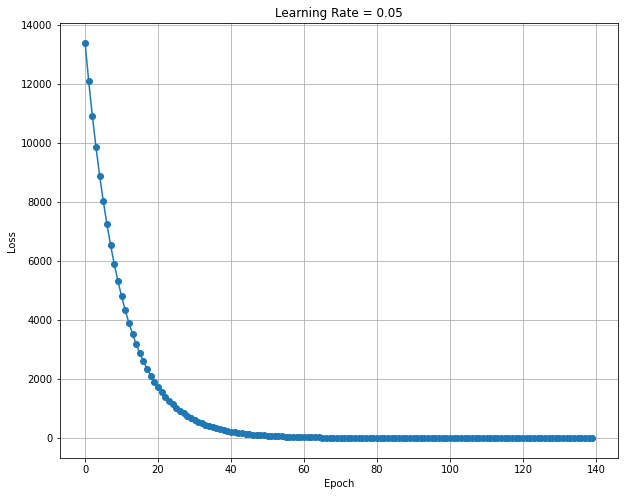

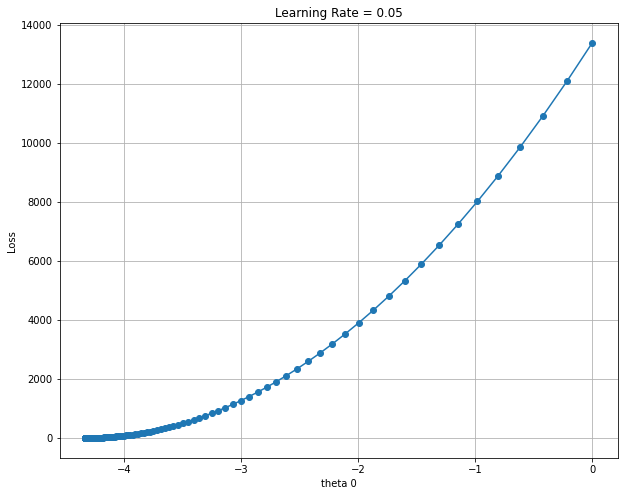

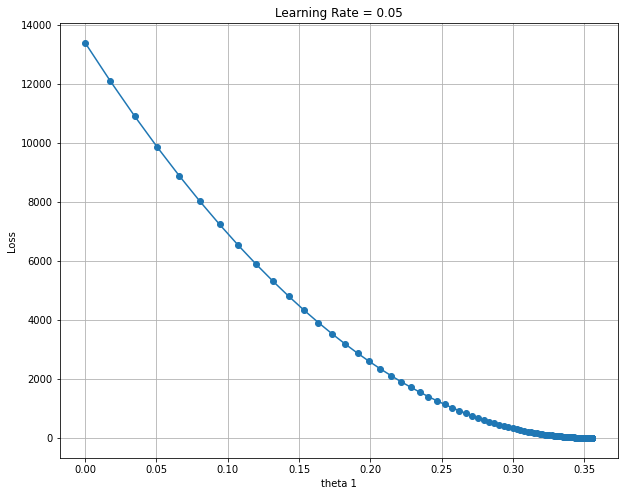

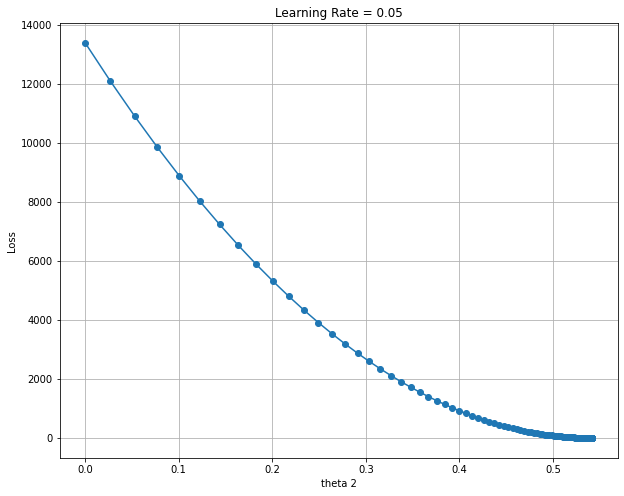

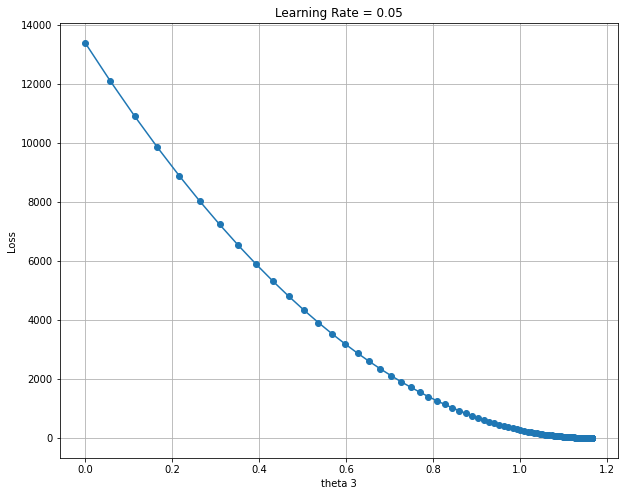

In [78]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.005 and max iterations = 500.

In [53]:
alpha = 0.005
iterations = 500
theta_list, cost, hypothesis, theta_opt = Newton_multi_variable_mini_batch(X, y, alpha, iterations)

Streaming output truncated to the last 5000 lines.
j =  [[188.27182549]]

Gradient Vector:
 [[  -19.05801713]
 [-1537.88459867]
 [-1546.28216978]
 [-1583.90422927]]

theta_new [[-3.82867012]
 [ 0.31428456]
 [ 0.47903051]
 [ 1.03082409]]

****************** Epoch 428 ********************

h(x): [[134.74835002]
 [163.42111881]
 [160.50859987]
 [176.37004622]
 [122.88780241]
 [ 91.55913972]
 [132.67867689]
 [ 99.61785794]
 [154.13166459]
 [145.24446535]
 [126.63925849]
 [125.58921457]
 [164.71268424]
 [134.5724092 ]
 [133.54475502]
 [166.99262158]
 [126.70885165]
 [160.60776515]
 [156.55004948]
 [139.81851252]
 [155.9134554 ]
 [154.22364749]
 [148.0651052 ]
 [133.00499889]
 [168.82077322]]

Error Vector:
 [[-17.25164998]
 [-21.57888119]
 [-19.49140013]
 [-19.62995378]
 [-19.11219759]
 [ -9.44086028]
 [-16.32132311]
 [-15.38214206]
 [-20.86833541]
 [-18.75553465]
 [-14.36074151]
 [-15.41078543]
 [-19.28731576]
 [-17.4275908 ]
 [-14.45524498]
 [-25.00737842]
 [-20.29114835]
 [-22.39223485]


In [54]:
h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.6650391924353107


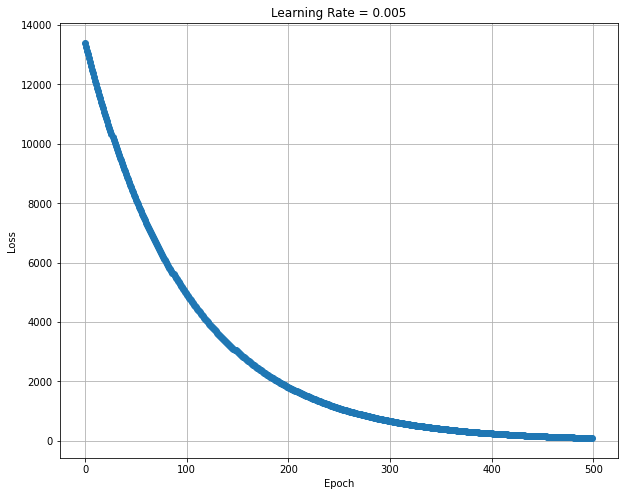

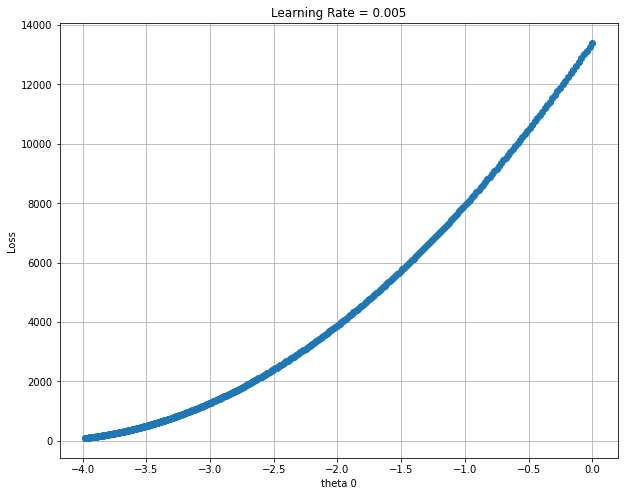

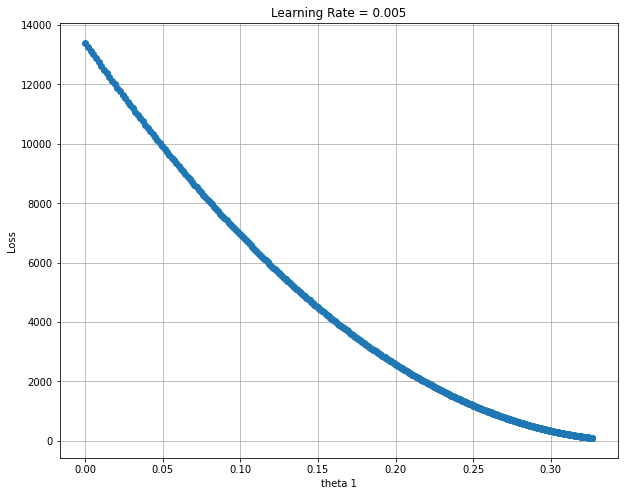

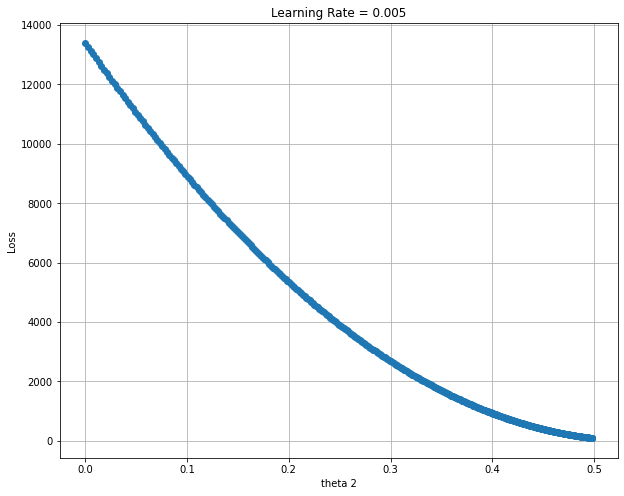

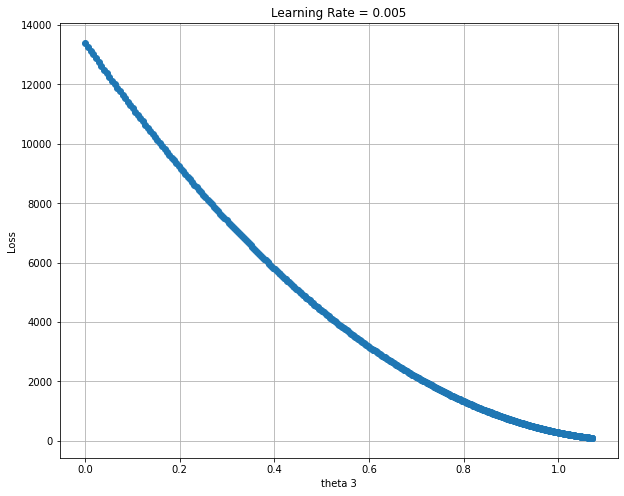

In [55]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.0005 and max iterations = 5000.

In [56]:
alpha = 0.0005
iterations = 5000
theta_list, cost, hypothesis, theta_opt = Newton_multi_variable_mini_batch(X, y, alpha, iterations)

Streaming output truncated to the last 5000 lines.
j =  [[99.89791005]]

Gradient Vector:
 [[  -13.78701405]
 [-1112.54158394]
 [-1118.61658272]
 [-1145.83325794]]

theta_new [[-3.96735386]
 [ 0.32566871]
 [ 0.49638216]
 [ 1.06816304]]

****************** Epoch 4928 ********************

h(x): [[139.6292627 ]
 [169.34062885]
 [166.32261139]
 [182.75859787]
 [127.33909723]
 [ 94.87563425]
 [137.48462097]
 [103.22625882]
 [159.71468803]
 [150.50557282]
 [131.22644017]
 [130.1383611 ]
 [170.67897791]
 [139.44694887]
 [138.38207056]
 [173.04150013]
 [131.29855416]
 [166.42536868]
 [162.22067269]
 [144.8830788 ]
 [161.56101962]
 [159.81000277]
 [153.42838311]
 [137.82276316]
 [174.93587186]]

Error Vector:
 [[-12.3707373 ]
 [-15.65937115]
 [-13.67738861]
 [-13.24140213]
 [-14.66090277]
 [ -6.12436575]
 [-11.51537903]
 [-11.77374118]
 [-15.28531197]
 [-13.49442718]
 [ -9.77355983]
 [-10.8616389 ]
 [-13.32102209]
 [-12.55305113]
 [ -9.61792944]
 [-18.95849987]
 [-15.70144584]
 [-16.57463132]


In [57]:
h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.6643025775672953


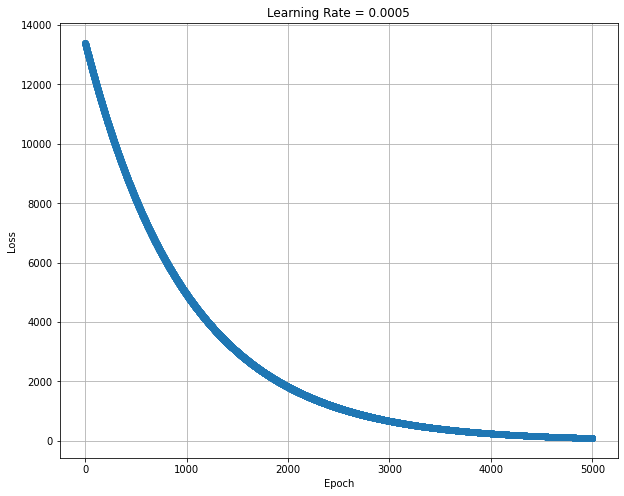

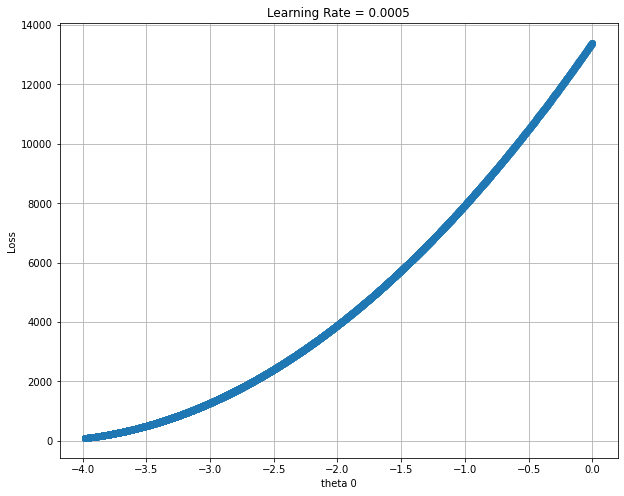

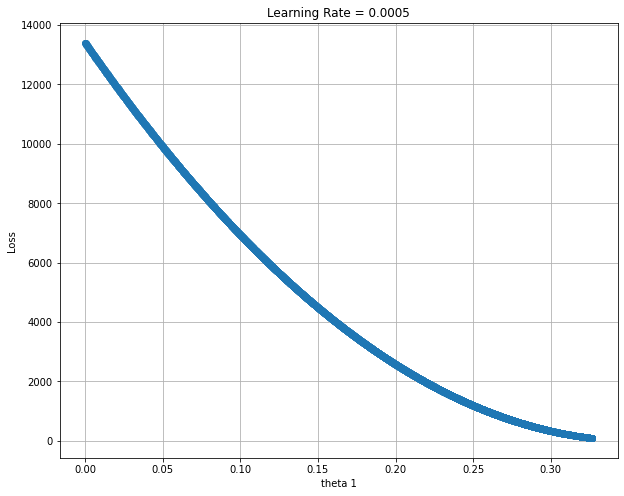

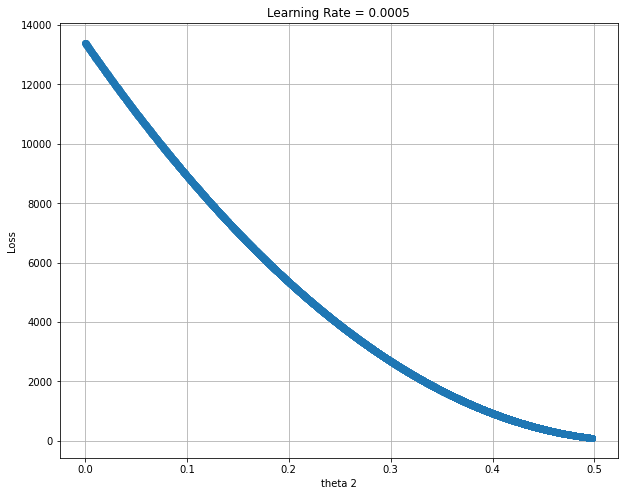

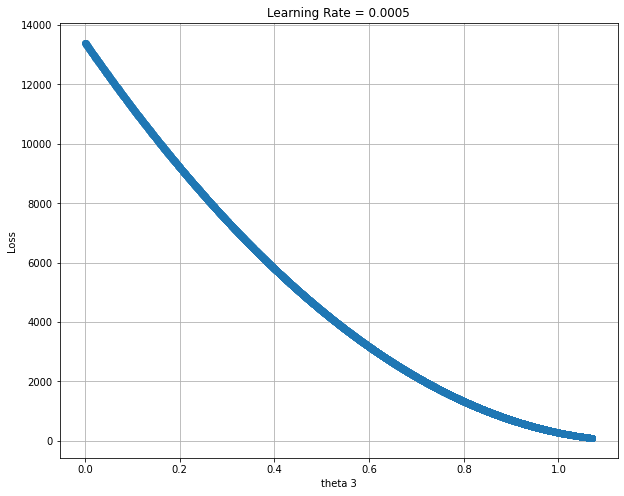

In [58]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.001 max iterations = 5000.

In [68]:
alpha = 0.001
iterations = 5000
theta_list, cost, hypothesis, theta_opt = Newton_multi_variable_mini_batch(X, y, alpha, iterations)

Streaming output truncated to the last 5000 lines.
j =  [[3.56959466]]

Gradient Vector:
 [[ -1.17160907]
 [-94.54286495]
 [-95.05911332]
 [-97.37196391]]

theta_new [[-4.30478213]
 [ 0.35336723]
 [ 0.53860007]
 [ 1.1590116 ]]

****************** Epoch 4928 ********************

h(x): [[151.50490133]
 [183.74325531]
 [180.46855179]
 [198.30243891]
 [138.16944234]
 [102.94492234]
 [149.17785521]
 [112.00577769]
 [173.29861651]
 [163.30625486]
 [142.38740852]
 [141.206787  ]
 [185.19543258]
 [151.30708148]
 [150.15163398]
 [187.75889019]
 [142.46565589]
 [180.58004872]
 [176.01773822]
 [157.20556088]
 [175.30198086]
 [173.40203788]
 [166.47765372]
 [149.5447568 ]
 [189.81438054]]

Error Vector:
 [[-0.49509867]
 [-1.25674469]
 [ 0.46855179]
 [ 2.30243891]
 [-3.83055766]
 [ 1.94492234]
 [ 0.17785521]
 [-2.99422231]
 [-1.70138349]
 [-0.69374514]
 [ 1.38740852]
 [ 0.206787  ]
 [ 1.19543258]
 [-0.69291852]
 [ 2.15163398]
 [-4.24110981]
 [-4.53434411]
 [-2.41995128]
 [-0.98226178]
 [-1.7944391

In [69]:
h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9874753523888992


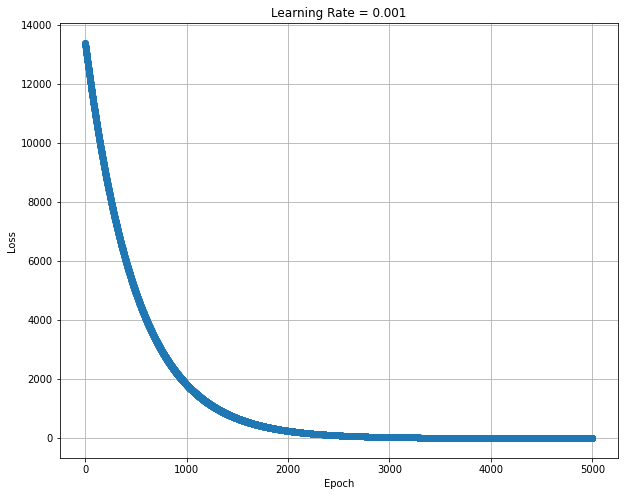

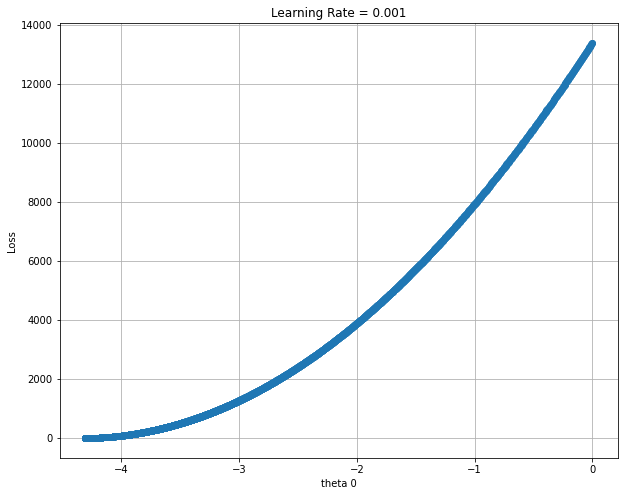

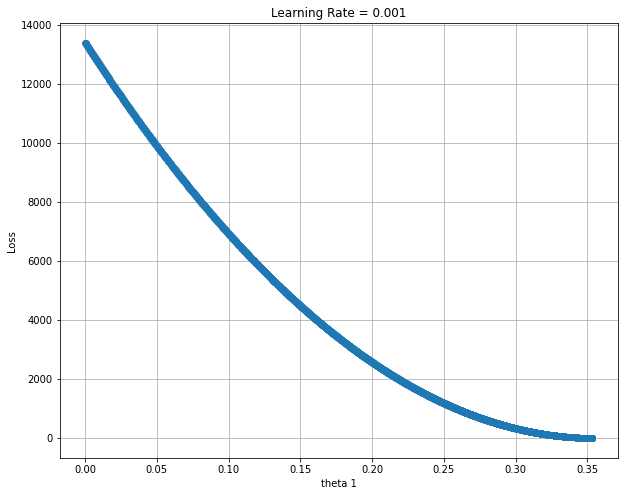

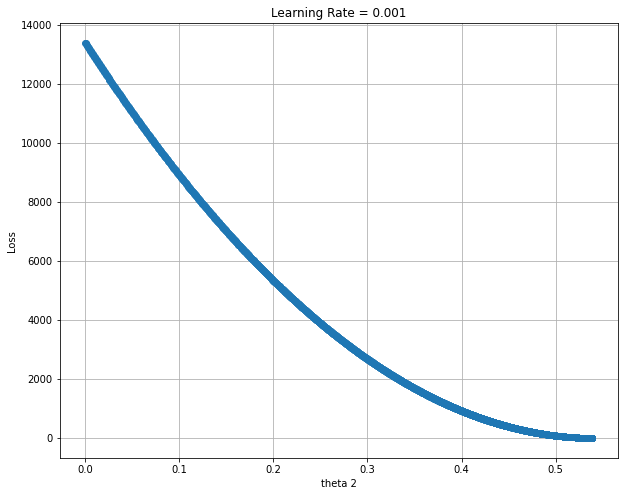

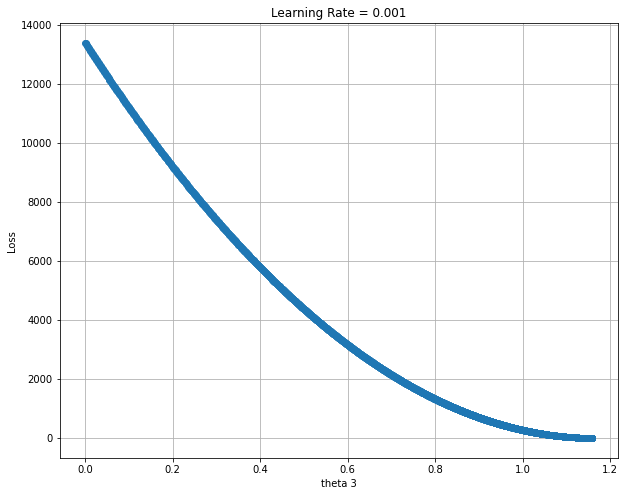

In [70]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')

##### The following results uses alpha = 0.01 and max iterations = 5000.

In [71]:
alpha = 0.01
iterations = 5000
theta_list, cost, hypothesis, theta_opt = Newton_multi_variable_mini_batch(X, y, alpha, iterations)

Streaming output truncated to the last 5000 lines.
 [-1.02371887e+00]
 [-7.97103403e+00]
 [ 1.03999358e+00]
 [-1.55702462e+00]]

j =  [[3.07648575]]

Gradient Vector:
 [[ -0.63769712]
 [-51.4588993 ]
 [-51.73988903]
 [-52.99875446]]

theta_new [[-4.31920862]
 [ 0.35455146]
 [ 0.54040506]
 [ 1.16289576]]

****************** Epoch 552 ********************

h(x): [[152.01263513]
 [184.35902853]
 [181.0733506 ]
 [198.96700389]
 [138.63248542]
 [103.28991855]
 [149.67779045]
 [112.38113927]
 [173.87938693]
 [163.85353818]
 [142.86458714]
 [141.68000904]
 [185.81607244]
 [151.81415234]
 [150.65483261]
 [188.38812089]
 [142.94309674]
 [181.18522118]
 [176.60762115]
 [157.73239913]
 [175.88946509]
 [173.9831549 ]
 [167.03556525]
 [150.04592163]
 [190.45049974]]

Error Vector:
 [[ 0.01263513]
 [-0.64097147]
 [ 1.0733506 ]
 [ 2.96700389]
 [-3.36751458]
 [ 2.28991855]
 [ 0.67779045]
 [-2.61886073]
 [-1.12061307]
 [-0.14646182]
 [ 1.86458714]
 [ 0.68000904]
 [ 1.81607244]
 [-0.18584766]
 [ 2.65483

In [72]:
h = X @ theta_opt
print('r2 score = ', r2_score(y, h))

r2 score =  0.9894856260766908


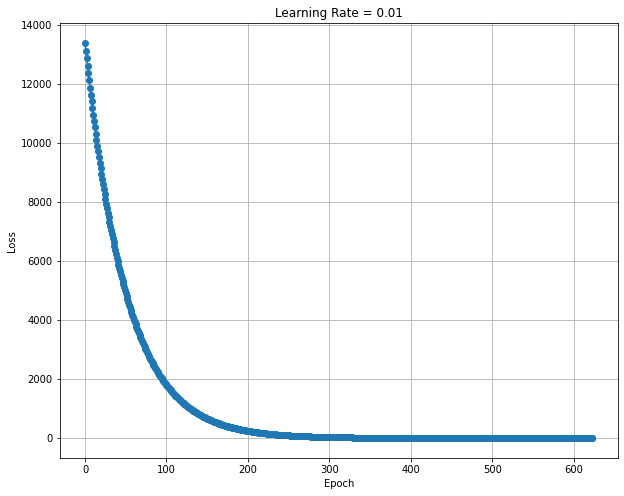

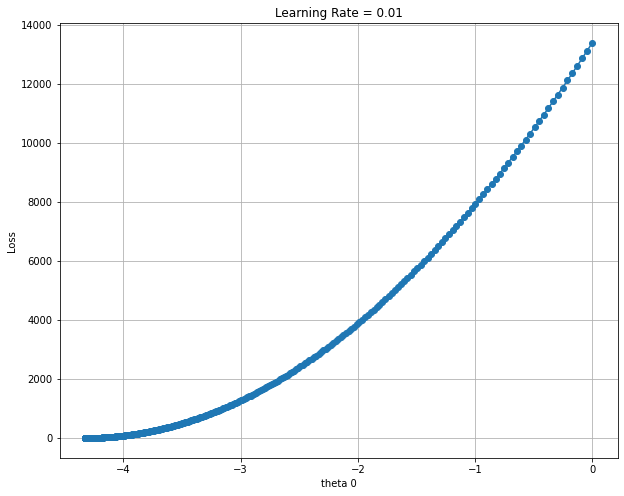

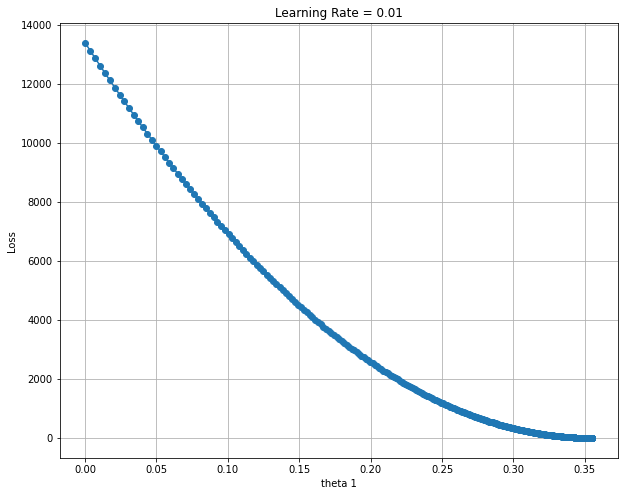

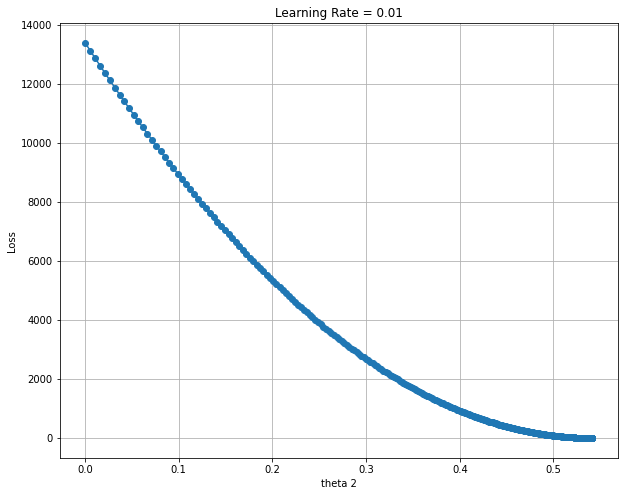

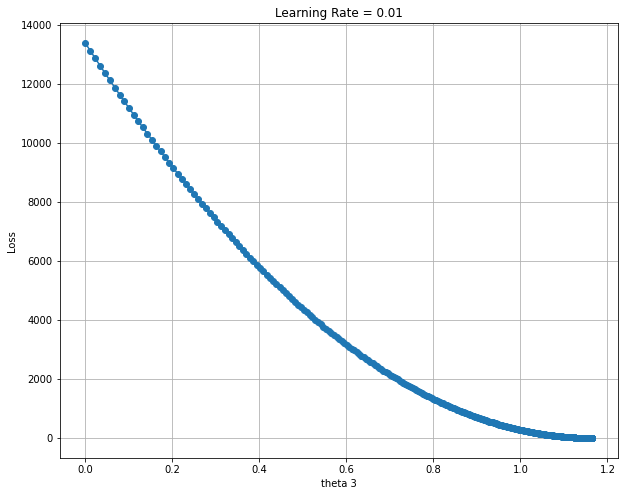

In [73]:
plot_loss_epoch(cost, alpha)
for i in range(np.array(theta_list).squeeze().shape[1]):
  plot_theta_loss(np.array(theta_list)[:,i], cost, alpha, f'theta {i}')